# Comparing Fandango's movie ratings with other sites to check for abnormalities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

In [2]:
wn.simplefilter('ignore')

In [3]:
fandango=pd.read_csv(r"C:\Users\KIIT0001\Documents\Python with Data Analytics\Data Library\fandango_scrape.csv")
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.sample(10)

,FILM,STARS,RATING,VOTES
446,Dan's Motel (2015),0.0,0.0,0
250,An Honest Liar (2015),4.0,3.8,19
28,Ted 2 (2015),4.5,4.1,6437
347,Fort Tilden (2015),3.0,2.5,4
127,Faith Of Our Fathers (2015),4.0,3.9,186
106,Spare Parts (2015),4.5,4.5,450
227,The Algerian (2015),5.0,4.5,23
218,Desert Dancer (2015),4.0,4.0,28
187,When Marnie Was There (2015),4.5,4.1,46
430,That Sugar Film (2015),5.0,5.0,1


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## Relation between popularity of a film and its rating

Text(0.5, 1.0, 'Relation between popularity of a film and its rating')

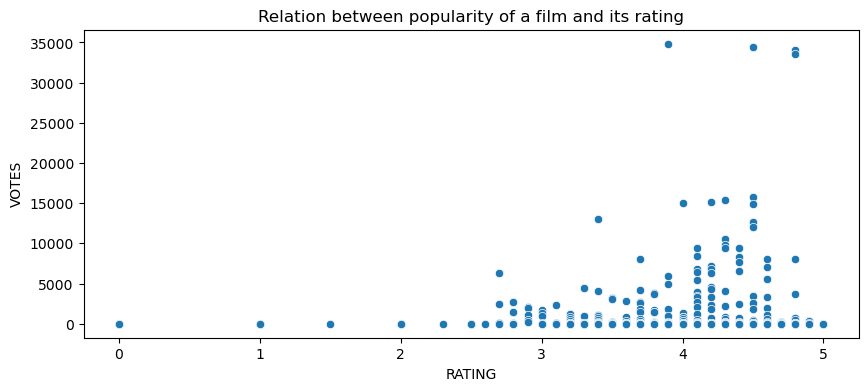

In [7]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='RATING',y='VOTES',data=fandango)
plt.title('Relation between popularity of a film and its rating')

In [8]:
#Observing the corelations between STARS, RATING and VOTES
fandango.corr(numeric_only=True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
#Introducing a column for the year of movie release
fandango['YEAR']=fandango['FILM'].str[-5:-1]
fandango


,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [10]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

## Plotting a graph for the number of movies reviewed every year

Text(0.5, 1.0, 'Movies reviewed every year')

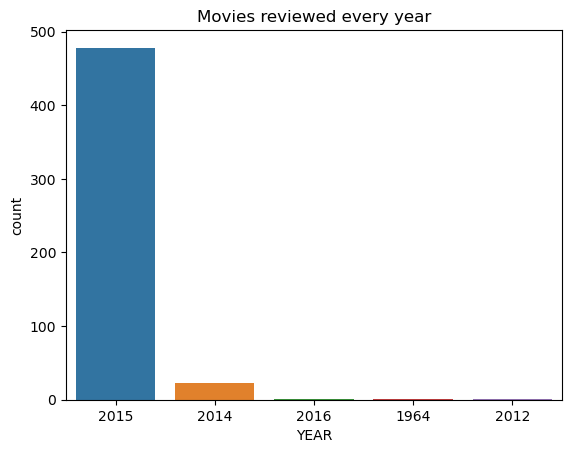

In [11]:
sns.countplot(data=fandango,x='YEAR')
plt.title('Movies reviewed every year')

## Top 10 movies with the highest number of votes

In [12]:
fandango.sort_values(by='VOTES',ascending=False).head(10)
#fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


## Removing the movies with no votes for evaluation

In [13]:
#movies with 0 votes
(fandango['VOTES']==0).sum()

69

In [14]:
reviewed_only=fandango[fandango['VOTES']>0]

In [15]:
reviewed_only['STARS_DIFF']=(reviewed_only['STARS']-reviewed_only['RATING']).round(2)

In [16]:
reviewed_only.head(5)

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


## Displaying the number of times a certain difference occurs

Text(0.5, 1.0, 'Number of times a certain star difference occurs')

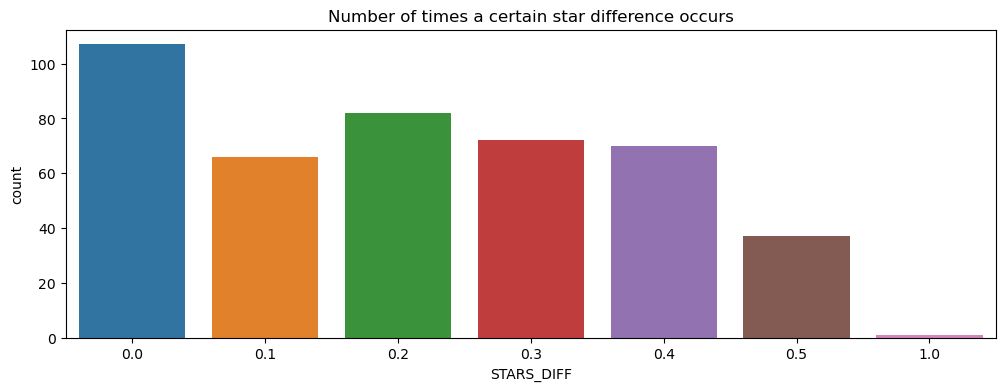

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data=reviewed_only,x='STARS_DIFF')
plt.title('Number of times a certain star difference occurs')

In [18]:
reviewed_only[reviewed_only['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Other sites

In [19]:
all_sites=pd.read_csv(r"C:\Users\KIIT0001\Documents\Python with Data Analytics\Data Library\all_sites_scores.csv")
all_sites.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
38,Saint Laurent (2015),51,45,52,6.8,6.3,8,2196
113,Inherent Vice (2014),73,52,81,7.4,6.7,286,44711
17,Southpaw (2015),59,80,57,8.2,7.8,128,23561
39,Maps to the Stars (2015),60,46,67,5.8,6.3,46,22440
78,Chappie (2015),30,57,41,7.4,7.0,637,125088


In [20]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


## Rotten Tomatoes

Text(0.5, 1.0, 'Rotten Tomatoes user score against the Rotten Tomatoes Tomatometer score')

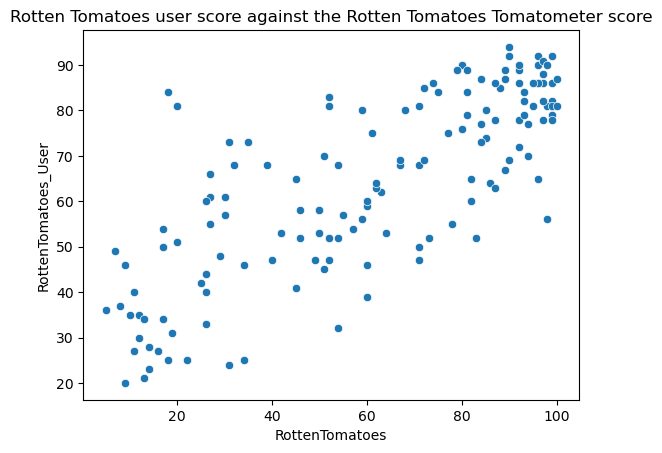

In [21]:
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.title('Rotten Tomatoes user score against the Rotten Tomatoes Tomatometer score')

### Plotting the RT score and RT user score difference and their count

In [22]:
all_sites['RT_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [23]:
all_sites.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5


In [24]:
all_sites['RT_Diff'].apply(abs).mean()

15.095890410958905

Text(0.5, 1.0, 'RT score and RT user score difference vs their count')

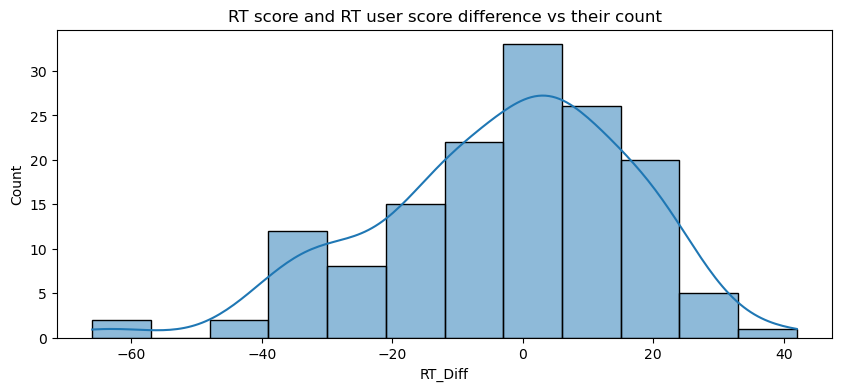

In [25]:
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites,x='RT_Diff',kde=True)
plt.title('RT score and RT user score difference vs their count')

Text(0.5, 1.0, 'Absolute value of RT score and RT user score difference vs their count')

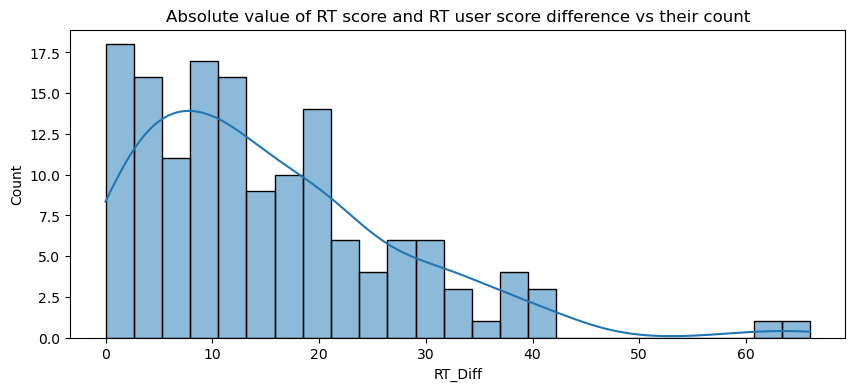

In [26]:
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites,x=all_sites['RT_Diff'].apply(abs),kde=True,bins=25)
plt.title('Absolute value of RT score and RT user score difference vs their count')

In [27]:
#Top 5 movies with user rating higher than critics
all_sites.nsmallest(5,'RT_Diff')[['FILM','RT_Diff']]

,FILM,RT_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [28]:
#Top 5 movies with critics rating higher than users
all_sites.nlargest(5,'RT_Diff')[['FILM','RT_Diff']]

,FILM,RT_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Metacritic

In [29]:
all_sites.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'RT_Diff'],
      dtype='object')

Text(0.5, 1.0, 'Metacritic user score against the Metacritic score')

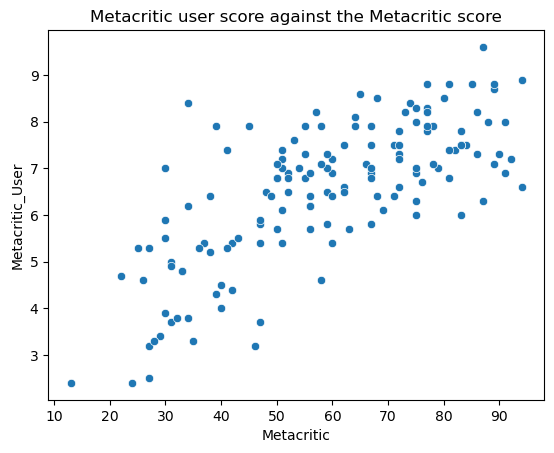

In [30]:
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.title('Metacritic user score against the Metacritic score')

Text(0.5, 1.0, 'Metacritic user vote count vs IMDB user vote count')

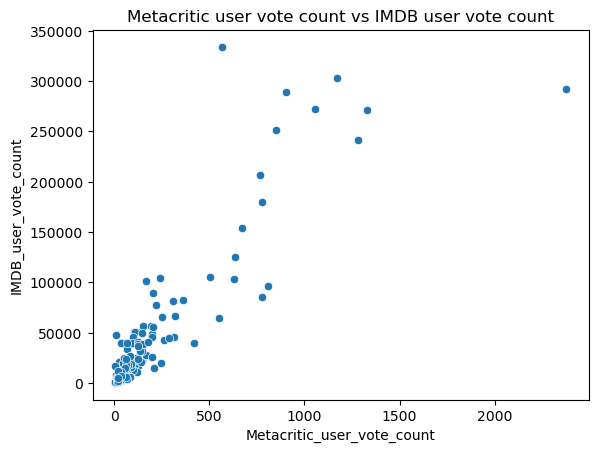

In [31]:
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')
plt.title('Metacritic user vote count vs IMDB user vote count')

In [32]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [33]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


## Fandango vs All sites

In [34]:
df=pd.merge(fandango,all_sites,on='FILM',how='inner')
df.sample(5)

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
108,Black Sea (2015),4.0,3.5,218,2015,82,60,62,6.6,6.4,37,16547,22
14,Unbroken (2014),4.5,4.1,9443,2014,51,70,59,6.5,7.2,218,77518,-19
86,Love & Mercy (2015),4.5,4.0,864,2015,89,87,80,8.5,7.8,54,5367,2
72,Blackhat (2015),3.0,2.8,1430,2015,34,25,51,5.4,5.4,80,27328,9
66,Project Almanac (2015),4.0,3.7,1834,2015,34,46,47,5.4,6.4,95,40057,-12


### Normalize all the columns on same scale

In [35]:
df['RT_Norm']=np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm']=np.round(df['RottenTomatoes_User']/20,1)

df['Meta_Norm']=np.round(df['Metacritic']/20,1)
df['Meta_U_Norm']=np.round(df['Metacritic_User']/2,1)

df['IMDB_Norm']=np.round(df['IMDB']/2,1)

In [36]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [37]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'RT_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [38]:
df_N=df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
df_N.shape

(145, 7)

In [39]:
## KDE plots for comparing Fandango ratings with the other sites

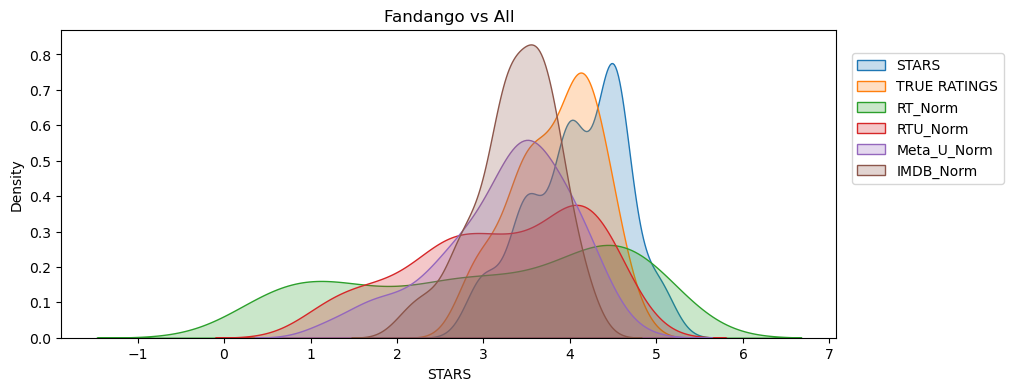

In [40]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=df_N,x='STARS',label='STARS',fill=True)
sns.kdeplot(data=df_N,x='RATING',label='TRUE RATINGS',fill=True)
sns.kdeplot(data=df_N,x='RT_Norm',label='RT_Norm',fill=True)
sns.kdeplot(data=df_N,x='RTU_Norm',label='RTU_Norm',fill=True)
sns.kdeplot(data=df_N,x='Meta_U_Norm',label='Meta_U_Norm',fill=True)
sns.kdeplot(data=df_N,x='IMDB_Norm',label='IMDB_Norm',fill=True)
plt.title('Fandango vs All')
plt.legend(loc=(1.02,0.5))
plt.show()

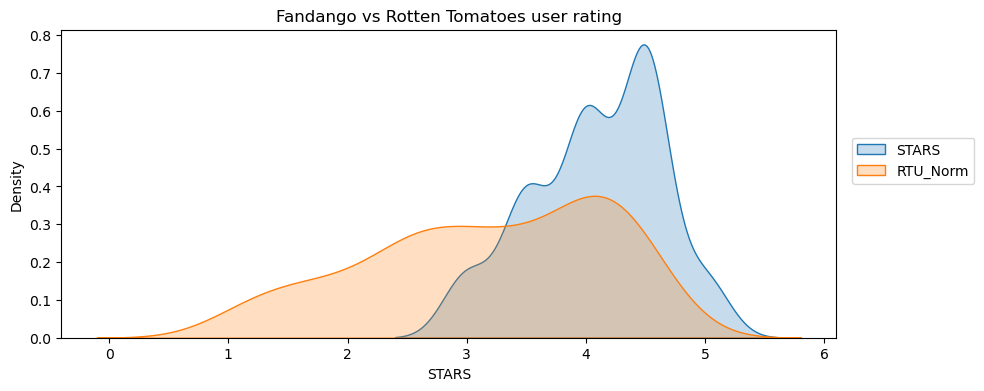

In [41]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=df_N,x='STARS',label='STARS',fill=True)
sns.kdeplot(data=df_N,x='RTU_Norm',label='RTU_Norm',fill=True)
plt.title('Fandango vs Rotten Tomatoes user rating')
plt.legend(loc=(1.02,0.5))
plt.show()

Text(0.5, 1.0, 'Fandango vs All')

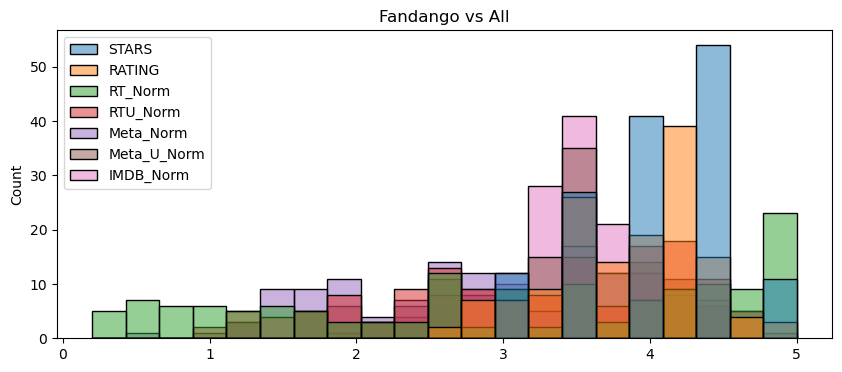

In [42]:
plt.figure(figsize=(10,4))
sns.histplot(df_N)
plt.title('Fandango vs All')

## Using the difference between normalized RT ratings and stars

In [43]:
df_N_F=df[['FILM', 'STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]
df_N_F['Norm_Diff_RTN_SN']=df['RT_Norm']-df['STARS']
df_N_F

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,Norm_Diff_RTN_SN
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1,-2.8
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6,-0.9
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7,-1.4
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7,-1.0
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3,0.4
...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4,0.9
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5,0.8
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9,0.1
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7,0.8


In [44]:
df_N_F_10=df_N_F.nsmallest(10,'RT_Norm')
df_N_F_10

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,Norm_Diff_RTN_SN
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2,-3.3
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0,-4.1
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0,-2.6
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4,-3.6
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0,-3.6
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3,-3.5
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8,-2.9
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8,-2.9
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8,-2.9
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7,-2.9


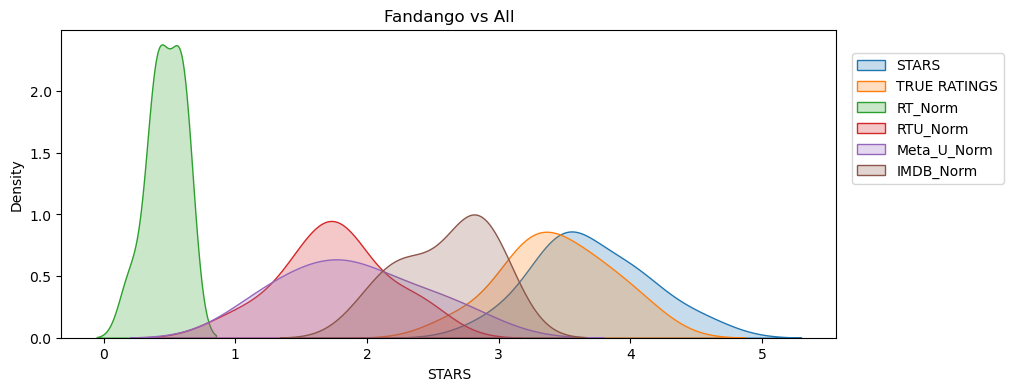

In [45]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=df_N_F_10,x='STARS',label='STARS',fill=True)
sns.kdeplot(data=df_N_F_10,x='RATING',label='TRUE RATINGS',fill=True)
sns.kdeplot(data=df_N_F_10,x='RT_Norm',label='RT_Norm',fill=True)
sns.kdeplot(data=df_N_F_10,x='RTU_Norm',label='RTU_Norm',fill=True)
sns.kdeplot(data=df_N_F_10,x='Meta_U_Norm',label='Meta_U_Norm',fill=True)
sns.kdeplot(data=df_N_F_10,x='IMDB_Norm',label='IMDB_Norm',fill=True)
plt.title('Fandango vs All')
plt.legend(loc=(1.02,0.5))
plt.show()

Inference:
-There is a clear uneven distribution for the Fandango stars and true ratings, accumulating around the values of 4-5. This implies that Fandango manipulates its data.